In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

/Users/maeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


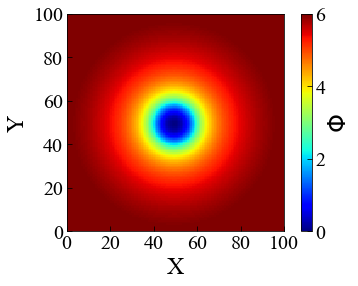

In [27]:
i = 3
dir1  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-128-2000st-T20-cg1-L100-3pwe-4thcd/'

folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"  #+ str(np.int(sample_frequency)) 

h5file1 = h5py.File(dir1+'NAllHDF'+"%03.f"%(i)+'.h5',"r")

#データ読み込み
Phiwv1to1  = h5file1[folder1+"/Phiwv1"].value 
Phiexa1 = h5file1[folder2+"/Phiexa"].value 

data01=Phiwv1to1[:,:,64]
data02=Phiexa1[:,:,64]

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


x = np.arange(0.0, 100.1, 100.0/128.0)
y = np.arange(0.0, 100.1, 100.0/128.0)
plt.pcolormesh(x,y,data02, cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。


plt.clim(-0.0, 6.0)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
pp.set_label("$\Phi$", fontsize=24) #カラーバーのラベル
plt.xlim([-0.0, 100.0]) # x方向の描画範囲を指定
plt.ylim([-0.0, 100.0]) # y方向の描画範囲を指定
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xticks(np.arange(0, 101, step=20))
plt.yticks(np.arange(0, 101, step=20))
#fig = plt.figure(figsize=(5, 5))
#ax.set_aspect('equal', adjustable='box')
#quadmesh.set_clim(vmin=0, vmax=15)
#plt.axes().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal')

#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maeda/Desktop/phiexa.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()


plt.show()

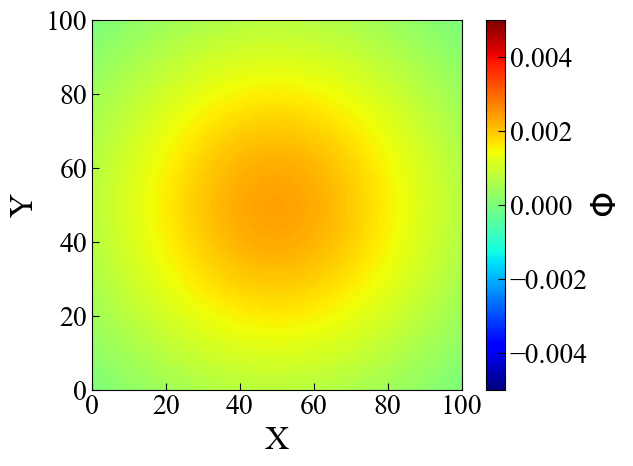

In [26]:
i = 1
dir1  = '/Users/maedarn/Dropbox/analysis/cluster formation by HI cloud collision/multipole/test7/'

folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Rho"  #+ str(np.int(sample_frequency)) 

#h5file1 = h5py.File(dir1+'NNNAllHDF'+"%03.f"%(i)+'.h5',"r")
with h5py.File(dir1+'NNNAllHDF'+"%03.f"%(i)+'.h5',"r") as f:

#データ読み込み
#Phiwv1to1  = h5file1[folder1+"/Phiwv1"].value 
#Phiexa1 = h5file1[folder2+"/Rho"].value 

    Phiwv1to1= f[folder1+"/Phiwv1"]
    Phiexa1 = f[folder2+"/Rho"]

    data01_3D= Phiwv1to1[()]
    data02_3D=Phiexa1[()]

    data01=Phiwv1to1[:,:,0]
    data02=Phiexa1[:,:,0]

m1=np.max(data01)
m2=np.max(data02)

data=data01-data02
data=data-m1+m2

fig = plt.figure()
ax = fig.add_subplot(111)
#fig.subplots_adjust(bottom=0, left=0, top=1, right=1)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ


x = np.arange(0.0, 100.1, 100.0/128.0)
y = np.arange(0.0, 100.1, 100.0/128.0)
plt.pcolormesh(x,y,data, cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。


plt.clim(-0.005, 0.005)
pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
pp.set_label("$\Phi$", fontsize=24) #カラーバーのラベル
plt.xlim([-0.0, 100.0]) # x方向の描画範囲を指定
plt.ylim([-0.0, 100.0]) # y方向の描画範囲を指定
plt.xlabel('X', fontsize=24)
plt.ylabel('Y', fontsize=24)
plt.xticks(np.arange(0, 101, step=20))
plt.yticks(np.arange(0, 101, step=20))
#fig = plt.figure(figsize=(5, 5))
#ax.set_aspect('equal', adjustable='box')
#quadmesh.set_clim(vmin=0, vmax=15)
#plt.axes().set_aspect('equal', 'datalim')
plt.gca().set_aspect('equal')

#pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
pp = PdfPages('/Users/maedarn/Desktop/phierr.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()


plt.show()

In [ ]:
with h5py.File('example.h5', 'r') as f:
    # データセットの取得
    dataset = f['/path/to/dataset']

    # データの読み込み
    data = dataset[()]